<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** =
* **UCID** =
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [ ]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

In [1]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

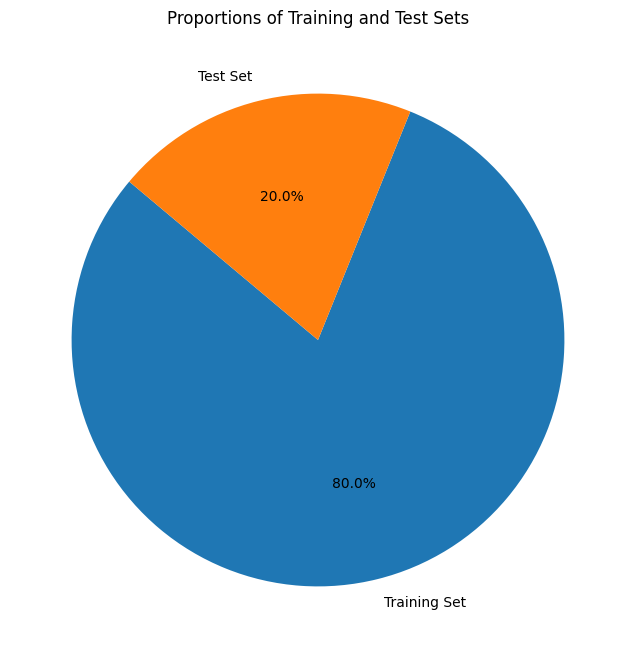

Number of entries in Training Set: 168
Number of entries in Test Set: 42


In [3]:
# 1.1
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting data into X (features) and y (target variable)
X = data.iloc[:, :-1]  # Exclude last column
y = data.iloc[:, -1]   # Last column, Target variable

# Stratified split of X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Plotting train and test proportions in a pie chart
train_size = len(y_train) / (len(y_train) + len(y_test))
test_size = len(y_test) / (len(y_train) + len(y_test))

plt.figure(figsize=(8, 8))
plt.pie([train_size, test_size], labels=['Training Set', 'Test Set'], autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Training and Test Sets')
plt.show()

# Displaying the number of entries within the Training and Test sets
print(f"Number of entries in Training Set: {len(y_train)}")
print(f"Number of entries in Test Set: {len(y_test)}")


<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2** .....................
    - I am choosing StandadScaler. StandardScaler scales the features such that they have a mean of 0 and a standard deviation of 1. I chose this scaling method, because it is good when the features are normally distributed or approx gaussian.
    - Justifications:
        - StandardScaler is compatible with a wide range of machine learning algorithms, such as KNN, SVM, etc.
        - StandardScaler keeps the original units of measurement and allows the interpretation of coefficients or feature importance in linear models.

In [4]:
# 1.2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

<font color='Green'><b>Answer:</b></font>

- **1.3** .....................
    - I am choosing Random Forest
    - Justification: 
        - Random Forest is chosen due to its ability to handle complex datasets with a mix of numerical and categorical data.
        - Less likely to overfit compared to some other models.


In [5]:
# 1.3
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [6]:
# 1.4
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


<font color='Green'><b>Answer:</b></font>

- **1.4** .....................

Output:

`Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}`


### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [8]:
# 1.5
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Using the same parameters grid and model from the previous GridSearchCV
grid_search_pca = GridSearchCV(rf, param_grid, cv=5)
grid_search_pca.fit(X_train_pca, y_train)

print("Best parameters with PCA:", grid_search_pca.best_params_)

Best parameters with PCA: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


<font color='Green'><b>Answer:</b></font>

- **1.5** .....................
    - I decided to use PCA because it looks for linear connections between area, perimeter, and "Tightness," making it good at handling these relationships. PCA sorts the data onto new axes that show the largest differences. PCA can also simplify complex data into 2D space without losing critical details, which helps us see patterns and spot outliers or anomalies in the data.

    - Before PCA (Full-dimensional data):
        - Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
    - After PCA (2 dimensions):
        - Best parameters with PCA: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

    - Comparing the best parameters, by reducing dimensions to 2, a simpler model had the best parameters. The complexity of the decision boundary decreased, allowing for more simpler patterns to be found using fewer estimators. This means that reducing dimensions simplifies the model for accurate predictions, and can also improve generalization by avoiding overfitting


### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

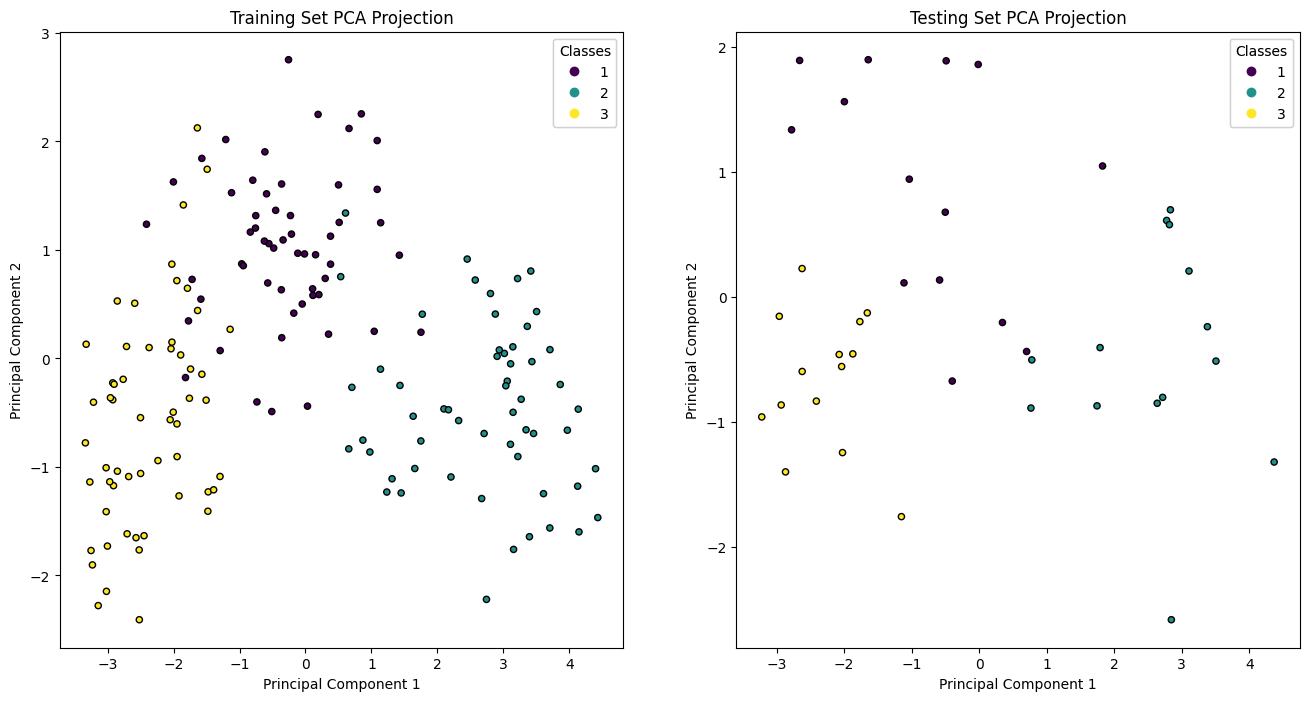

In [9]:
# 1.6
# Set up plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for training data
scatter = ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=20)
legend1 = ax[0].legend(*scatter.legend_elements(), title="Classes")
ax[0].add_artist(legend1)
ax[0].set_title('Training Set PCA Projection')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Scatter plot for testing data
scatter = ax[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=20)
legend2 = ax[1].legend(*scatter.legend_elements(), title="Classes")
ax[1].add_artist(legend2)
ax[1].set_title('Testing Set PCA Projection')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.show()

## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

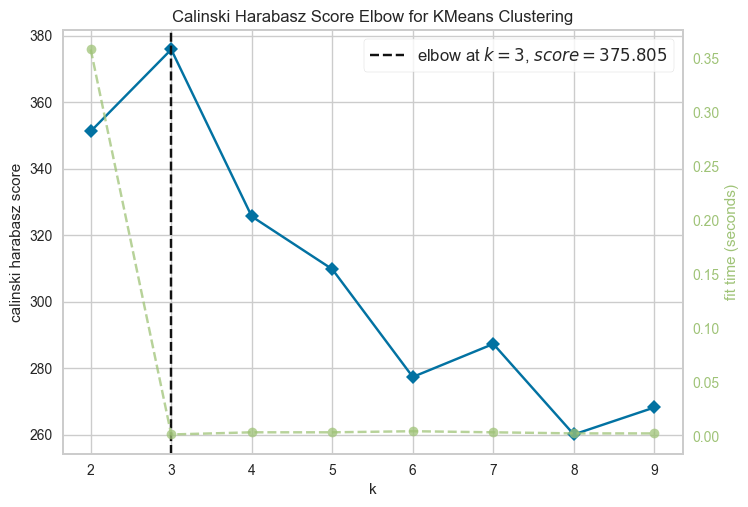

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
# 2.1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Create a pipeline that includes a scaler and the K-Means clustering algorithm
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Use the KelbowVisualizer to find the optimal number of clusters k
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k=(2,10), metric='calinski_harabasz')
visualizer.fit(X)  # X is your dataset features
visualizer.show()

<font color='Green'><b>Answer:</b></font>

- **2.1** .....................
    - This score is a method of evaluating the quality of clustering (higher is better)
    - This elbow method is a heuristic used in determining the number of clusters in a data set
    - The elbow represents a point where the addition of another cluster does not give better performance

    - The KelbowVisualizer results shows k = 3 as optimal. 
        - The score increases from k = 2 to k = 3 and then decreases
        - increasing the number of clusters >3 does not provide any significant improvement

    - The result of k = 3 aligns well with the expected number of seed varieties in the dataset, 
        - data is  likely to be separated into 3 Classes. 



### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [11]:
# 2.2
# Get the optimal number of clusters
optimal_k = visualizer.elbow_value_  # or set manually based on the Kelbow plot

# Update the pipeline with the optimal number of clusters
pipeline.set_params(kmeans__n_clusters=optimal_k)
pipeline.fit(X)

# Label the training data
labels = pipeline.predict(X)

### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [12]:
# 2.3
# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

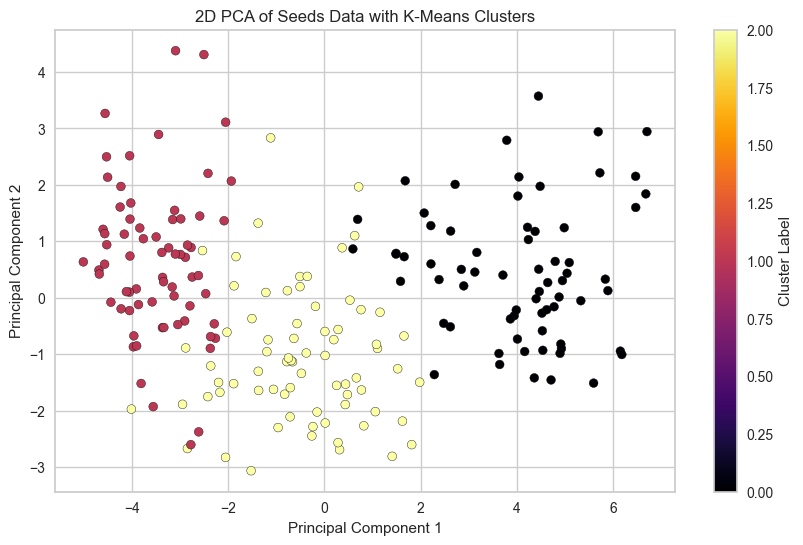

In [15]:
# 2.4
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='inferno', edgecolor='k', s=40)
plt.title('2D PCA of Seeds Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question** .....................
    - Two clusters on the middle and right show good separation along both component axes, with very few overlapping. 
        - This shows distinct features in the dataset
    - The left cluster shows some overlap with the yellow cluster, showing that K-Means found a pattern
        - These 2 clusters may be more complex than the dataset may show
    - The distribution of the left and middle near the origin could mean that the features in these regions do not vary as much as the right-most cluster. 
    - The overlap could also be due to similar seed features or a limitation of using two dimensions.